In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [11]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['target'] = data['target'] # Target refers to the column that we will be predicting
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Data Dictionary

# CRIM: per capita crime rate by town.
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of nonretail business acres per town.
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# NOX: nitric oxides concentration (parts per 10 million).
# RM: average number of rooms per dwelling.
# AGE: proportion of owner-occupied units built prior to 1940.
# DIS: weighted distances to five Boston employment centers.
# RAD: index of accessibility to radial highways.
# TAX: full-value property-tax rate per $10,000.
# PTRATIO: pupil-teacher ratio by town.
# B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
# LSTAT: % lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s. Target

In [14]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64

In [16]:
# Continuous value - That can take any value withing a range Ex - price of a house
# Categorical value - That can take a discrete number of values Ex - grade of a student

# If you look closely at the dataset,most of the columns are continuous variables.

df[['CRIM','B','RM']] # Some examples of continuous variables


# Statistics like mean,median makes sense of continuous variables

,CRIM,B,RM
0,0.00632,396.90,6.575
1,0.02731,396.90,6.421
2,0.02729,392.83,7.185
3,0.03237,394.63,6.998
4,0.06905,396.90,7.147
...,...,...,...
501,0.06263,391.99,6.593
502,0.04527,396.90,6.120
503,0.06076,396.90,6.976
504,0.10959,393.45,6.794


In [19]:
df['CHAS'].value_counts() # This is a categorical variable. Takes just two values 0 or 1.

# Mode makes sense for categorical variables

0.0    471
1.0     35
Name: CHAS, dtype: int64

## DATASET CAN BE DIVIDED INTO THREE PARTS

1. Train Set - The one that you use to train the model. Model will learn patterns using this data only

2. Validation Set - The one we use to tweak the model to its best performance. Basically find the best set of model parameters.

3. Test Set - The one that we use to check our model performance.The model will never see the data points in test set while     training. So it serves a good indicator to  evaluate your model performance on our end.
             
              

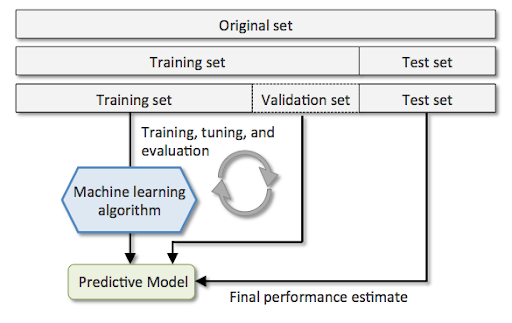


Source : http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/08_CV_Ensembling/08_CV_Ensembling.html

In [20]:
# We can use the train test split function for splitting data randomly into train and test set


x_train,x_test,ytrain,ytest = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

print(x_train.shape,ytrain.shape)
print(x_test.shape,ytest.shape)

# Notice that i have dropped the target column when assigning data points to x_train and x_test because target will be 
# what you will be predicting so including them as inputs will be basically like you are giving the answer to the model yourself

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# One thing to note here is that this is not the only way of splitting data into train and test

# You can filter data as well specifically for test set as well.

# Like if you have arrow of time concept involved i.e test set should always be ahead of train data.
# In that case you split on the basis of date.

# In your case some records will have null clearing dates. So that will be test set.